
# Input and output

## Keyboard input

Python has a function called *input* for getting input from the user and assigning it a variable name.

In [15]:
value=input("Tell me a number: ")
type(value)

Tell me a number:  78898.9


str

The value contains the keyboard input as expected, but it is a string. We want to use a number and not a string, so we need to convert it from a string to a number.

In [17]:
v = eval(value)
type(v)

float

## Screen output

Screen output is possible by using the `print` command. The argument of the print function can be of different type. 

### str.format() Formatting

You can format your output by modifying the string given to the `print` function by `str.format()`, The `str` contains text that is written to be the screen, as well as certain format specifiers contained in curly braces {}. The format function contains the list of variables that are to be printed. 

In [18]:
string1 = "How"
string2 = "are you my friend?"
int1 = 34
int2 = 942885
float1 = -3.0
float2 = 3.141592653589793e-14
print(' ***')

print(string1)
print(string1 + ' ' + string2)

print(' 1. {} {}'.format(string1, string2)) 

print(' 2. {0:s} {1:s}'.format(string1, string2))
print(' 3. {0:s} {0:s} {1:s} - {0:s} {1:s}'.format(string1, string2)) 

print(' 4. {0:10s}{1:5s}'.format(string1, string2))
print(' ***')
print(int1, int2)
print(' 6. {0:d} {1:d}'.format(int1, int2)) 
print(' 7. {0:8d} {1:10d}'.format(int1, int2)) 
print(' ***')
print(' 8. {0:0.3f}'.format(float1))
print(' 9. {0:6.3f}'.format(float1)) 
print('10. {0:8.3f}'.format(float1)) 
print(2*' 11. {0:8.3f}'.format(float1))
print(' ***')
print('12. {0:0.3e}'.format(float2)) 
print('13. {0:10.3e}'.format(float2)) 
print('14. {0:10.3f}'.format(float2))
print(' ***')
print('15. 12345678901234567890')
print('16. {0:s}--{1:8d},{2:10.3e}'.format(string2, int1, float2))

 ***
How
How are you my friend?
 1. How are you my friend?
 2. How are you my friend?
 3. How How are you my friend? - How are you my friend?
 4. How       are you my friend?
 ***
34 942885
 6. 34 942885
 7.       34     942885
 ***
 8. -3.000
 9. -3.000
10.   -3.000
 11.   -3.000 11.   -3.000
 ***
12. 3.142e-14
13.  3.142e-14
14.      0.000
 ***
15. 12345678901234567890
16. are you my friend?--      34, 3.142e-14


### %-Formatting

A very similar formatting can be achieved with the `%`operator.

In [22]:
name = "Frank"
print("Hello, %s." % name)

Hello, Frank.


### f-Strings

**Formatted string literals** are the string literals that start with an `f` at the beginning and use curly braces {} to enclose the expressions that will be replaced with other values.

In [23]:
name = "Python Lecture"
number = 3
fstring = f"I'm here for the {number}. time and this {name} is awesome!"
print(fstring)

I'm here for the 3. time and this Python Lecture is awesome!


In [24]:

times = 100
fstring = f"You just have to sent me {times:10.3f} Euros."
print(fstring)

You just have to sent me    100.000 Euros.


## File input/output

File input and output is one of the most important features. We will have a look at reading and writing of text files with numpy and pandas. Python itself also allows you to [open](https://www.programiz.com/python-programming/methods/built-in/open) files and the file object provides the methods [read, write](https://www.programiz.com/python-programming/file-operation) and [close](https://www.programiz.com/python-programming/file-operation).

In [ ]:
import numpy as np

with open('a.txt', 'r') as file_1,open('b.txt','r') as file_2:
    for a,b in zip(file_1,file_2):
        print(int(a)+int(b))


file_1.close()
file_2.close()

10
12
14
97
9
9


### File I/O with NumPy

Most of the time we want import numbers from text files. So direct connection to NumPy seems useful and we will study that first.

In [25]:
import numpy as np # don't forget to import numpy

#### Reading data from a text file


Often you would like to analyze data that you have stored in a text file. Consider, for example, the data file below for an experiment measuring the free fall of a mass.

~~~
Data for falling mass experiment
Date: 16-Aug-2013
Data taken by Frank and Ralf
data point	time (sec) 	height (mm)	uncertainty (mm)
0		0.0		180		3.5
1		0.5		182		4.5
2		1.0		178		4.0
3		1.5		165		5.5
4		2.0		160		2.5
5		2.5		148		3.0
6		3.0		136		2.5
~~~

Suppose that the name of the text file is **MyData.txt**. Then we can read the data into four different arrays with the following NumPy statement:


In [27]:
dataPt, time, height, error = np.loadtxt("MyData.txt", skiprows=4 , unpack=True)

If you don't want to read in all the columns of data, you can specify which columns to read in using the usecols key word. For example, the call

In [31]:
time, height = np.loadtxt("MyData.txt", skiprows=5 , usecols = (1,2), unpack=True)

reads in only columns 1 and 2; columns 0 and 3 are skipped.

#### Writing data to a text file

There are plenty of ways to write data to a data file in Python. We will stick to one very simple one that’s suitable for writing data files in text format. It uses the NumPy [savetxt](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.savetxt.html) routine, which is the counterpart of the loadtxt routine introduced in the previous section. The general form of the routine is

~~~
savetxt(filename, array, fmt="%0.18e", delimiter=" ", newline="\n", header="", footer="", comments="# ")
~~~

We illustrate savetext below with a script that first creates four arrays by reading in the data file MyData.txt, as discussed in the previous section, and then writes that same data set to another file MyDataOut.txt.

In [33]:
dataPt, time, height, error = np.loadtxt("MyData.txt", skiprows=5 , unpack=True)

In [35]:
list(zip(dataPt, time, height, error))

[(1.0, 0.5, 182.0, 4.5),
 (2.0, 1.0, 178.0, 4.0),
 (3.0, 1.5, 165.0, 5.5),
 (4.0, 2.0, 160.0, 2.5),
 (5.0, 2.5, 148.0, 3.0),
 (6.0, 3.0, 136.0, 2.5)]

In [38]:
np.savetxt('MyDataOut.txt',list(zip(dataPt, time, height, error)), fmt="%12.3f")

In [39]:
cat MyDataOut.txt

       1.000        0.500      182.000        4.500
       2.000        1.000      178.000        4.000
       3.000        1.500      165.000        5.500
       4.000        2.000      160.000        2.500
       5.000        2.500      148.000        3.000
       6.000        3.000      136.000        2.500


### File I/O with Pandas

[Pandas](https://pandas.pydata.org/docs/user_guide/index.html) is a software library written for the Python programming language. It is used for data manipulation and analysis. It provides special data structures and operations for the manipulation of numerical tables and time series and builds on top of numpy.

- Easy handling of missing data
- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
   
The data formats provided by the pandas module are used by several other modules, such as the [trackpy](https://soft-matter.github.io/trackpy/v0.3.2/) which is a moduly for feature tracking and analysis in image series.

#### Short intro to Pandas

In [42]:
import pandas as pd # import the pandas module

Pandas provides two data structures

* Series
* Data Frames

A **[Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers,
Python objects, etc.). The axis labels are collectively referred to as the index. 

In [48]:
my_simple_series = pd.Series(np.random.randn(7), index=['a', 'b', 'c', 'd', 'e','f','g'])
my_simple_series

a    1.160711
b   -0.296427
c    1.881074
d   -1.197978
e    0.280311
f    1.538339
g    1.681957
dtype: float64

In [50]:
my_simple_series

-0.2964266043928443

There is a whole lot of functionality built into pandas data types. You may of course also obtain the same functionality using numpy commands, but you may find the pandas abbrevations very useful.

In [20]:
my_simple_series.agg(['min','max','sum','mean']) # aggregate a number of properties into a single array

min    -1.523075
max     0.525265
sum    -2.119315
mean   -0.302759
dtype: float64

A **[DataFrame](https://pandas.pydata.org/pandas-docs/stable/api.html#dataframe)** is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). The example below shows how such a DataFrame can be generated from the scratch. In addition to the data supplied to the DataFrame method, an index column is generated when creating a DataFrame. As in the case of *Series* there is a whole lot of functionality integrated into the DataFrame data type which you may explore on the website.

In [56]:
df = pd.DataFrame()

In [57]:
df = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)),columns=['column 1', 'column 2', 'columns 3', 'column 4', 'column 5'])
df.head()

,column 1,column 2,columns 3,column 4,column 5
0,3,9,3,7,4
1,2,2,4,6,7
2,6,1,7,4,5
3,3,4,4,3,0
4,5,6,8,0,2


Due to the labelling of the columns, each column may be accessed by its column label. Labeling by names  improves readability considerably.

In [58]:
df['column 4']

0    7
1    6
2    4
3    3
4    0
Name: column 4, dtype: int64

If you don't like this format, you can always return to a simple numpy array with the *as_matrix()* method.

In [59]:
df.values

array([[3, 9, 3, 7, 4],
       [2, 2, 4, 6, 7],
       [6, 1, 7, 4, 5],
       [3, 4, 4, 3, 0],
       [5, 6, 8, 0, 2]])

#### Reading CSV data with Pandas

DataFrames may also be populated by text files such as comma separated value files (short *.csv*). These files contain data in text format but also a column label, which can be read by the pandas method *read_csv()*. You can find an example below, which reads the data from the dust sensor on my balcony from April, 11th. You see the different columns, where **P1** and **P2** correspond to the **PM10** and **PM2.5** dust values in $\mu g/m^3$.

In [68]:
data = pd.DataFrame()
data = pd.read_csv("2018-04-11_sds011_sensor_12253.csv",delimiter=";",parse_dates=False)
data.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,12253,SDS011,6189,52.527,13.39,2018-04-11T00:01:58,25.87,NaN,NaN,19.37,NaN,NaN
1,12253,SDS011,6189,52.527,13.39,2018-04-11T00:04:24,25.63,NaN,NaN,20.53,NaN,NaN
2,12253,SDS011,6189,52.527,13.39,2018-04-11T00:06:55,26.30,NaN,NaN,22.00,NaN,NaN
3,12253,SDS011,6189,52.527,13.39,2018-04-11T00:09:23,24.60,NaN,NaN,20.30,NaN,NaN
4,12253,SDS011,6189,52.527,13.39,2018-04-11T00:11:51,25.17,NaN,NaN,20.23,NaN,NaN


<Axes: >

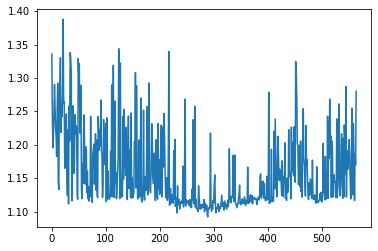

In [63]:
(data['P1']/data['P2']).plot()